### Monthly global tempetratues compared to baseline
#### Original  visualization: https://www.washingtonpost.com/news/energy-environment/wp/2018/01/18/2017-was-among-the-planets-hottest-years-on-record-government-scientists-report/


In [1]:
library(ggplot2)
library(repr)
library(extrafont)
library(reshape)
options(repr.plot.width = 8, repr.plot.height = 6)
options(warn = 0)

Registering fonts with R


In [2]:
df <- read.csv('GLB.Ts+dSST.csv', stringsAsFactors = F, skip = 1,)[1 : 13]
df2 <- melt(df, id.vars = 'Year', measure.vars = colnames(df)[2 : 13])

In [3]:
head(df2)

Year,variable,value
1880,Jan,-0.29
1881,Jan,-0.15
1882,Jan,0.15
1883,Jan,-0.31
1884,Jan,-0.15
1885,Jan,-0.58


In [4]:
# Calculate some important constants
fromYear <- min(df$Year)
toYear <- max(df$Year)

xLabels <- c('JAN.', 'FEB.', 'MAR.', 'APR.', 'MAY', 'JUNE', 'JULY', 'AUG.', 'SEP.', 'OCT.', 'NOV', 'DEC.')
yLabelsFace <- c('plain', 'plain', 'plain', 'plain', 'plain', 'plain', 'plain', 'bold')

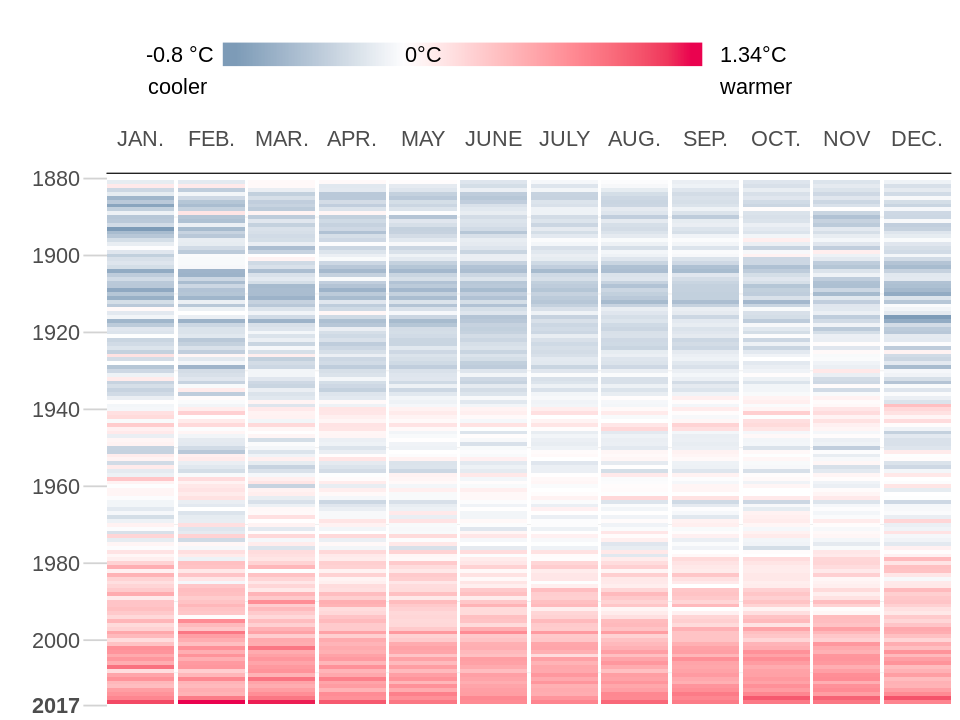

In [5]:
ggplot(df2, aes(x = variable, y = Year, fill = value)) +
    geom_tile(aes(width = 0.95)) +
    scale_fill_gradient2(
        low = '#095e89',
        mid = "white",
        high = '#ea024f',
        midpoint = 0,
        space = "Lab",
        breaks = c(- 0.8, 0, 1.34),
        labels = c('-0.8 °C \n cooler  ', '0°C \n ', ' 1.34°C \n warmer')
    ) +
    xlab('') +
    ylab('') +
    scale_y_continuous(
        trans = 'reverse',
        expand = c(0.01, 0.01),
        breaks = c(seq(fromYear, toYear, 20), 2017),
        limits = c(toYear, fromYear)
    ) +
    scale_x_discrete(
        expand = c(0, 0),
        position = 'top',
        labels = xLabels
    ) +
    theme_light() +
    theme(
        panel.grid.major = element_blank(),
        panel.border = element_blank(),
        axis.line.x.top = element_line(),
        axis.text.x = element_text(size = 13),
        axis.text.y = element_text(size = 13, face = yLabelsFace),
        axis.ticks.x = element_blank(),
        axis.ticks.y = element_line(size = 0.5, color = 'lightgray'),
        axis.ticks.length = unit(0.5, 'cm'),
        legend.position = 'top',
        legend.margin = margin(t = 20, b = - 25, unit = 'pt'),
        legend.justification = c(0.3, 0)
    ) +
    guides(
        fill = guide_colourbar(barwidth = 20,
        barheight = 1,
        ticks = FALSE,
        title = '',
        label.vjust = 6.6,
        label.hjust = c(1.2, 0, - 0.3),
        label.theme = element_text(size = 13),
        size = 5))